# Business Case 1

### Modellbildung und Evaluation

In [108]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

sns.set()

Importieren des Datensatzes, welcher im "Data Prep" Notebook exportiert wurde:

In [109]:
data_prepared = pd.read_csv('data_prepared.csv')

In [110]:
data_prepared

,Age,Gender,Quit,YearsOverall,BasicSalary,Contract,CusSize,TechRole,ThisYearBonus,LastYearBonus,Level
0,28,1,0,9.0,61200.0,Unlimited contract,1000+,1,1,1,Management
1,39,0,0,13.0,108000.0,Unlimited contract,1000+,0,0,0,Management
2,32,1,0,13.0,85000.0,Unlimited contract,1000+,1,1,1,Management
3,35,0,0,5.0,75000.0,Unlimited contract,1000+,1,1,0,Management
4,22,1,1,2.0,45000.0,Unlimited contract,1000+,1,1,1,Employee
...,...,...,...,...,...,...,...,...,...,...,...
1112,32,1,0,10.0,80000.0,Unlimited contract,1000+,1,1,1,Management
1113,24,1,1,3.0,10164.0,Temporary contract,11 to 50,1,0,0,Employee
1114,36,1,0,4.0,40000.0,Temporary contract,up to 10,1,0,0,Employee
1115,30,0,0,8.0,85000.0,Unlimited contract,1000+,1,1,1,Management


<Axes: >

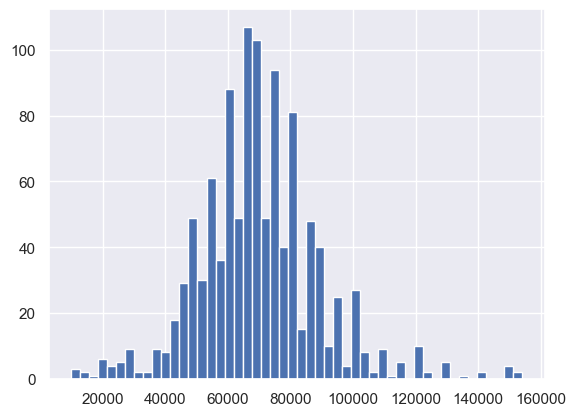

In [111]:
# Declare a variable that is equal to the 99th percentile of the 'BasicSalary' variable
q = data_prepared['BasicSalary'].quantile(0.99)

# Create a new data file with the condition that all prices must be below the 99th percentile of 'Price'
# Remove the top 1% of the data about 'PreisTicket'
data_prepared = data_prepared[data_prepared['BasicSalary'] < q]

data_prepared['BasicSalary'].hist(bins=50)

### Check Oversampling der Zielvariable

0    907
1    198
Name: Quit, dtype: int64


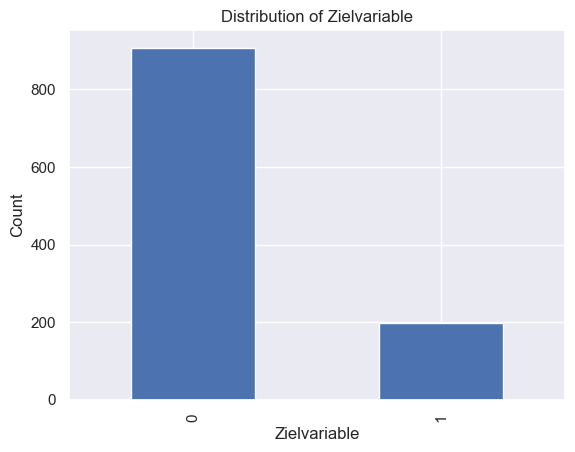

In [112]:
# Analyse der Zielvariable 


zielvariable_counts = data_prepared['Quit'].value_counts()
print(zielvariable_counts)

zielvariable_counts.plot(kind='bar')
plt.xlabel('Zielvariable')
plt.ylabel('Count')
plt.title('Distribution of Zielvariable')
plt.show()


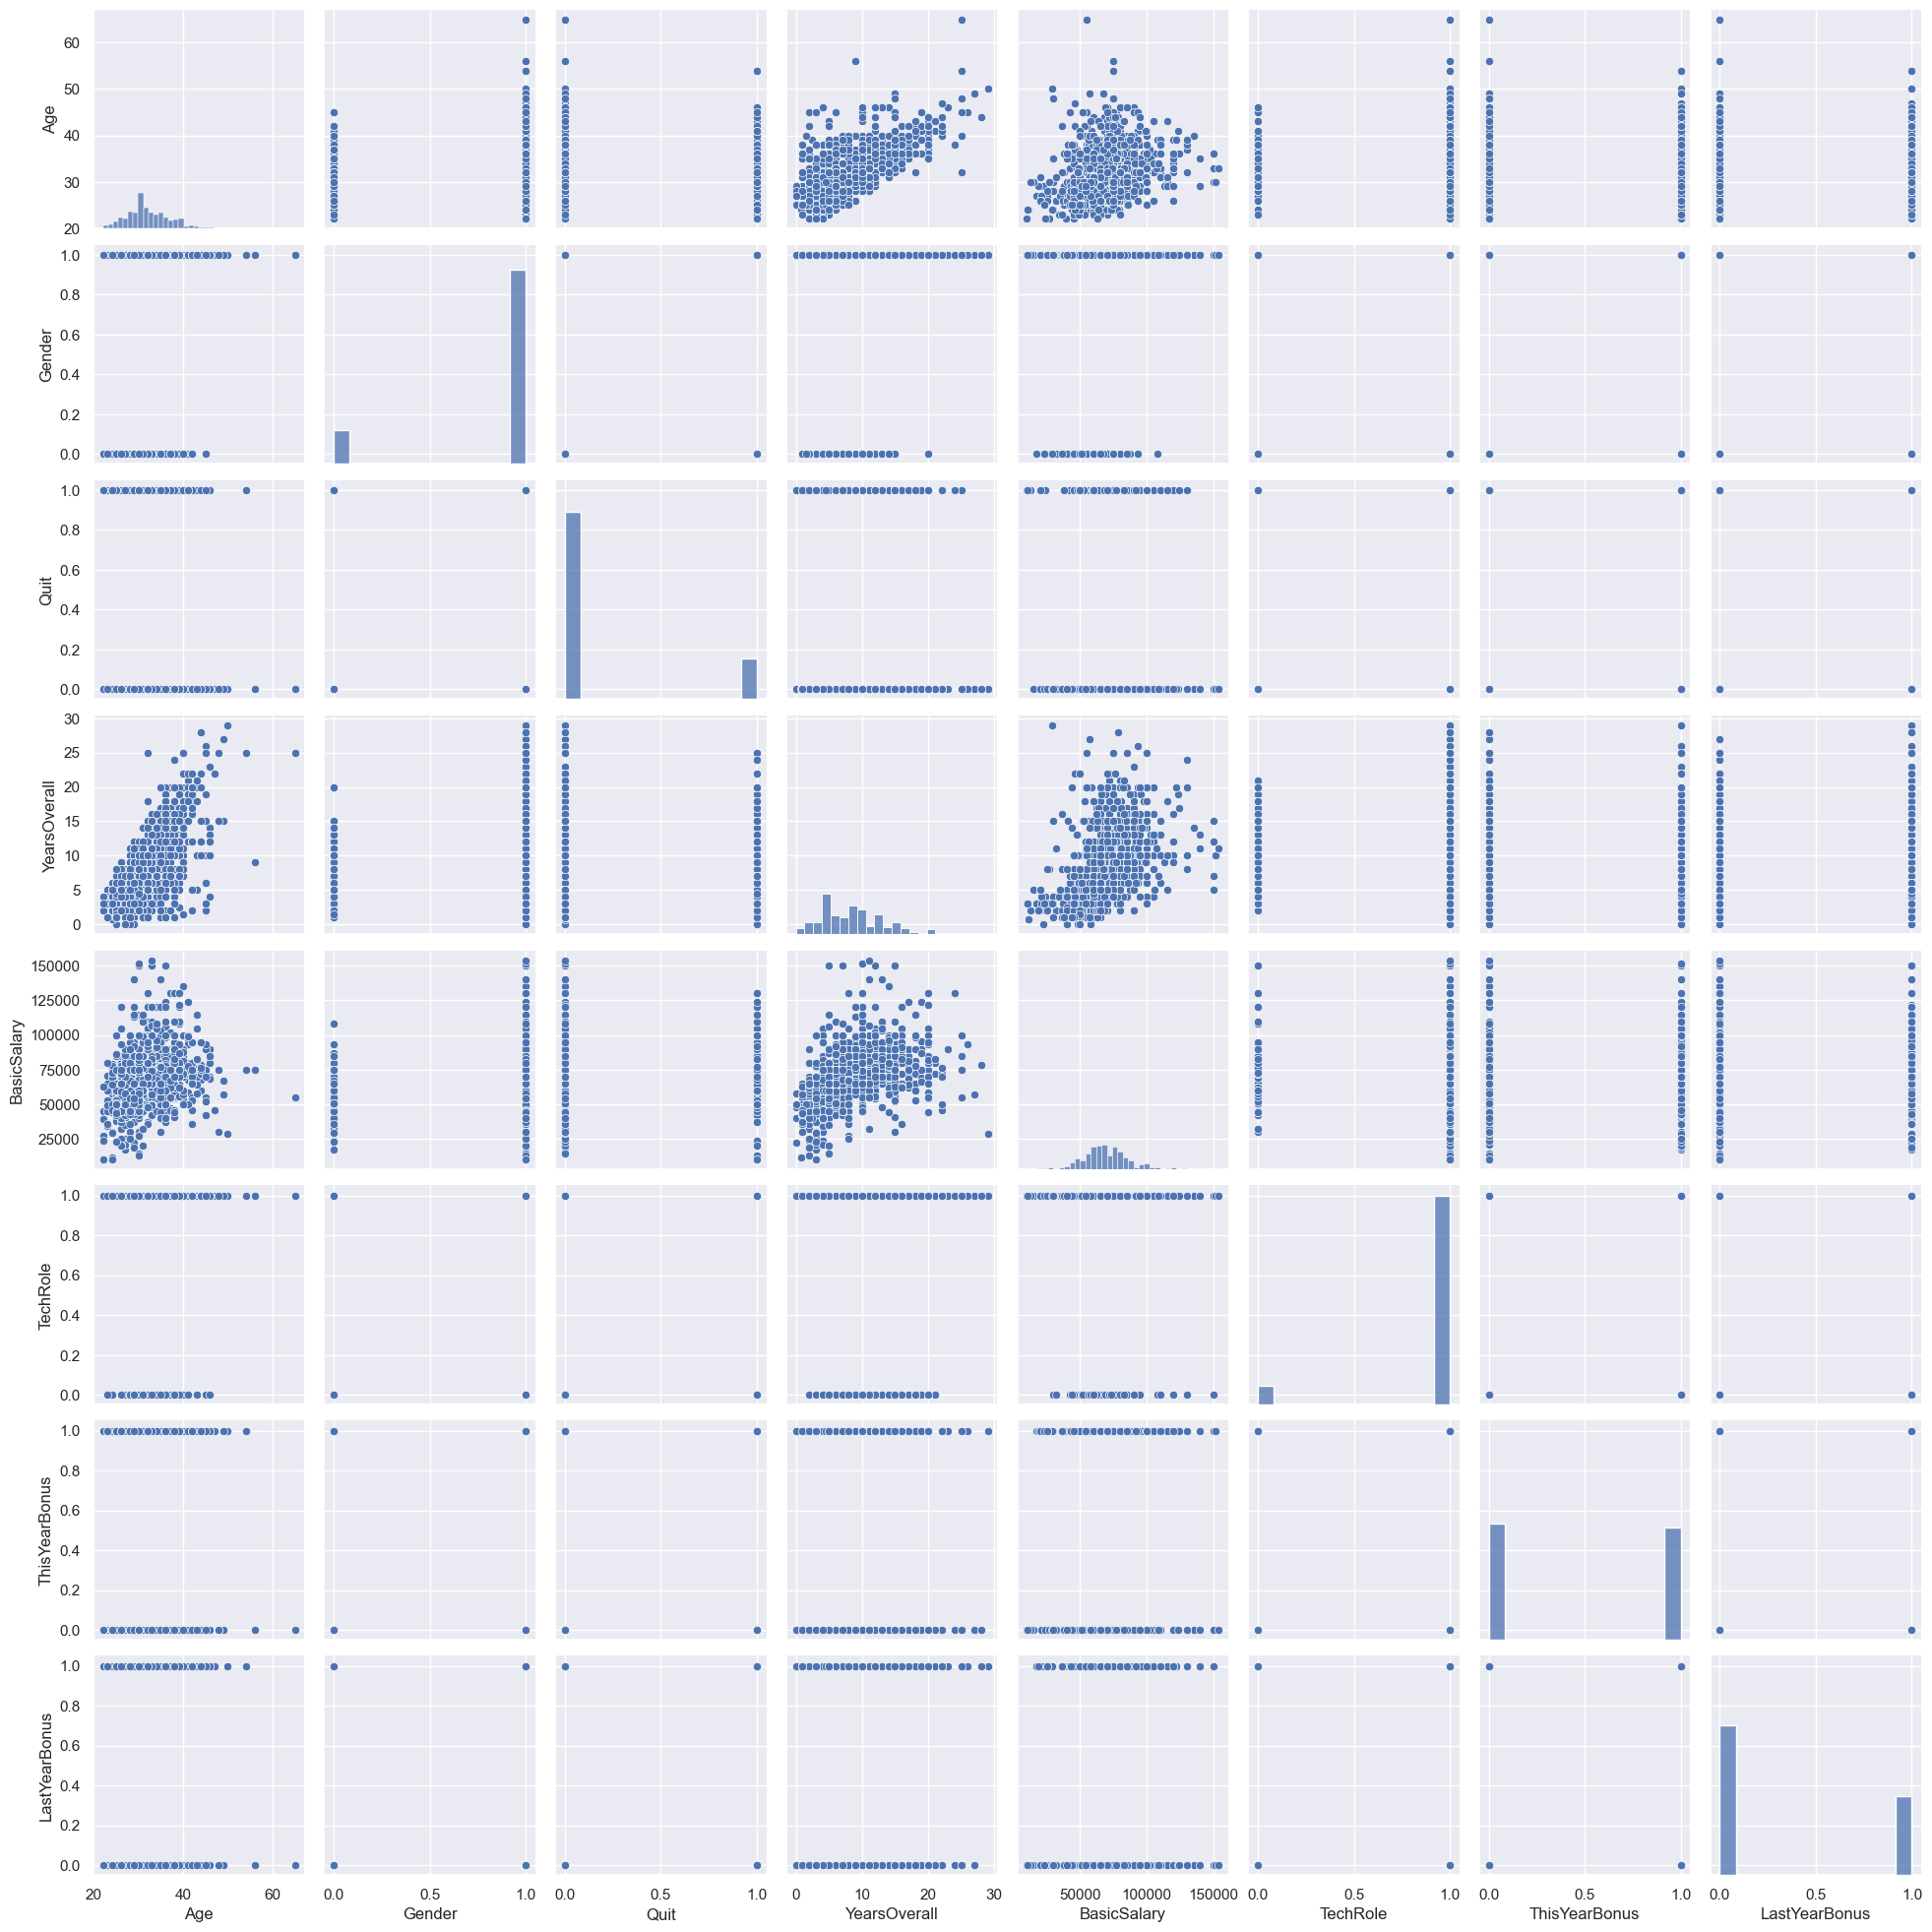

In [113]:
# streudiagramm für alle variablen
sns.pairplot(data_prepared)

### Dummy Variablen erstellen

In [114]:
data_dummies = pd.get_dummies(data_prepared, drop_first=True)
data_dummies.head()

,Age,Gender,Quit,YearsOverall,BasicSalary,TechRole,ThisYearBonus,LastYearBonus,Contract_Unlimited contract,CusSize_101 to 1000,CusSize_11 to 50,CusSize_51 to 100,CusSize_up to 10,Level_Management,Level_Top Management
0,28,1,0,9.0,61200.0,1,1,1,1,0,0,0,0,1,0
1,39,0,0,13.0,108000.0,0,0,0,1,0,0,0,0,1,0
2,32,1,0,13.0,85000.0,1,1,1,1,0,0,0,0,1,0
3,35,0,0,5.0,75000.0,1,1,0,1,0,0,0,0,1,0
4,22,1,1,2.0,45000.0,1,1,1,1,0,0,0,0,0,0


In [115]:
data_dummies.describe()

,Age,Gender,Quit,YearsOverall,BasicSalary,TechRole,ThisYearBonus,LastYearBonus,Contract_Unlimited contract,CusSize_101 to 1000,CusSize_11 to 50,CusSize_51 to 100,CusSize_up to 10,Level_Management,Level_Top Management
count,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000
mean,32.323077,0.849774,0.179186,8.617738,69804.154751,0.914932,0.491403,0.345701,0.954751,0.329412,0.140271,0.120362,0.040724,0.594570,0.036199
std,5.140390,0.357455,0.383681,4.930221,19454.562130,0.279109,0.500152,0.475812,0.207944,0.470212,0.347426,0.325532,0.197740,0.491197,0.186870
min,22.000000,0.000000,0.000000,0.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,1.000000,0.000000,5.000000,59000.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,1.000000,0.000000,8.000000,70000.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,35.000000,1.000000,0.000000,12.000000,80000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,65.000000,1.000000,1.000000,29.000000,154000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Auf Multikollinearität prüfen

# Modeling

In [116]:
# Definition der Input- und Zielvariablen
targets = data_dummies['Quit']
inputs = data_dummies.drop(['Quit'],axis=1)


In [117]:
# Aufteilen in  80% Trainings- und 20% Testdaten
from sklearn.model_selection import train_test_split

# Aufteilung der Daten in 80% Trainings- und 20% Testdaten
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365)

### Standardisierung

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

### Oversampling

In [119]:
from collections import Counter

# hier Oversampling, da Klasse 1 nur 20% ausmacht


# RandomOverSampler um Dysbalance auszugleichen

# sampling_strategy = 1.0 - erstellt ein 1:1 Verhältnis von 1 und 0 in den Trainingsdaten
ros =  RandomOverSampler(sampling_strategy=1.0, random_state=42)

x_train_res, y_train_res = ros.fit_resample(x_train, y_train)

print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))


x_train = x_train_res
y_train = y_train_res


Original dataset shape Counter({0: 729, 1: 155})
Resampled dataset shape Counter({0: 729, 1: 729})


## Modellbildung Logistische Regression

#### Model Creation

In [120]:
# Modell erstellen
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

#### Evaluation

In [121]:
# Werte vorhersagen
predictions_lr_train = model_lr.predict(x_train)
predictions_lr_test = model_lr.predict(x_test)

##### Confusion matrix

In [122]:
# confusion matrix erstellen für train data
cm = confusion_matrix(y_train, predictions_lr_train)
print(cm)

[[445 284]
 [297 432]]


In [123]:
# confusion matrix erstellen für test data
cm = confusion_matrix(y_test, predictions_lr_test)
print(cm)

[[106  72]
 [ 19  24]]


In [124]:
print("Trainingsdaten Logistic Regression:")
print(classification_report(y_train, predictions_lr_train))
print("--------------------------------------------------------")
print("Testdaten Logistic Regression:")
print(classification_report(y_test, predictions_lr_test))

Trainingsdaten Logistic Regression:
              precision    recall  f1-score   support

           0       0.60      0.61      0.61       729
           1       0.60      0.59      0.60       729

    accuracy                           0.60      1458
   macro avg       0.60      0.60      0.60      1458
weighted avg       0.60      0.60      0.60      1458

--------------------------------------------------------
Testdaten Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.60      0.70       178
           1       0.25      0.56      0.35        43

    accuracy                           0.59       221
   macro avg       0.55      0.58      0.52       221
weighted avg       0.73      0.59      0.63       221



##### Check Feature importance

[-7.58614840e-01 -3.10466813e-01 -2.48000039e-01 -1.78865853e-01
 -1.09372884e-01 -4.69467977e-02 -1.51118207e-02 -2.09860749e-03
  1.29901500e-05  9.50192735e-02  2.43993973e-01  2.45615519e-01
  3.65259975e-01  3.67676682e-01]


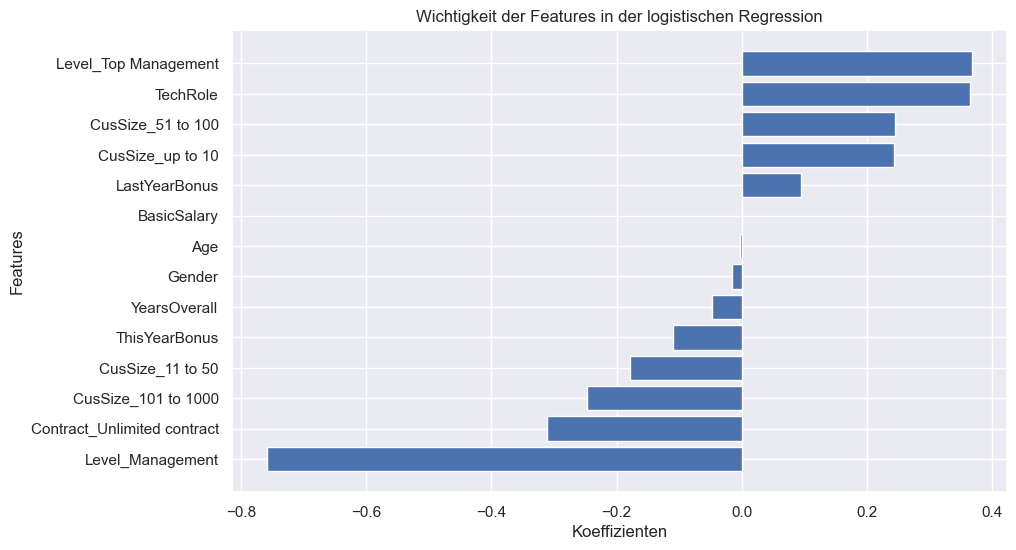

In [125]:
coefficients = model_lr.coef_[0]
feature_names = np.array(x_train.columns)

# Sortieren der Koeffizienten nach ihrer Wichtigkeit
sorted_indices = np.argsort(coefficients)
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

print(sorted_coefficients)

# Darstellung der Wichtigkeit der Features
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_coefficients)
plt.xlabel("Koeffizienten")
plt.ylabel("Features")
plt.title("Wichtigkeit der Features in der logistischen Regression")
plt.show()

## Modellbildung Decision Tree

#### Model Creation

In [126]:
# Modell erstellen mit fixem random_state (ermöglicht die Reproduzierbarkeit von zufälligen Abläufen oder Zufallsgenerierungen)
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Hyperparameter Optimization

#### Evaluation

In [127]:
# Werte vorhersagen für train data
predictions_dt_train = model_dt.predict(x_train)

# Werte vorhersagen für test data
predictions_dt_test = model_dt.predict(x_test)

##### Confusion matrix

In [128]:
# confusion matrix erstellen für train data
cm = confusion_matrix(y_train, predictions_dt_train)
print(cm)

[[727   2]
 [  0 729]]


In [129]:
# confusion matrix erstellen für test data
cm = confusion_matrix(y_test, predictions_dt_test)
print(cm)

[[154  24]
 [ 31  12]]


In [130]:
print("Trainingsdaten Decision Tree:")
print(classification_report(y_train, predictions_dt_train))
print("--------------------------------------------------------")
print("Testdaten Decision Tree:")
print(classification_report(y_test, predictions_dt_test))

Trainingsdaten Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       729
           1       1.00      1.00      1.00       729

    accuracy                           1.00      1458
   macro avg       1.00      1.00      1.00      1458
weighted avg       1.00      1.00      1.00      1458

--------------------------------------------------------
Testdaten Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       178
           1       0.33      0.28      0.30        43

    accuracy                           0.75       221
   macro avg       0.58      0.57      0.58       221
weighted avg       0.74      0.75      0.74       221



In [131]:
tree_depth = [1, 2 ,3, 4, 5, 8, 10]
for i in tree_depth:
    
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(x_train, y_train)
    
    print('Max tree depth: ', i)
    print('Train results:')
    print(classification_report(y_train, tree.predict(x_train)))
    print("--------------------------------------------------------")
    print('Test results:')
    print(classification_report(y_test, tree.predict(x_test)))
    print('##############################################################################')

Max tree depth:  1
Train results:
              precision    recall  f1-score   support

           0       0.56      0.84      0.67       729
           1       0.69      0.35      0.47       729

    accuracy                           0.60      1458
   macro avg       0.62      0.60      0.57      1458
weighted avg       0.62      0.60      0.57      1458

--------------------------------------------------------
Test results:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       178
           1       0.30      0.35      0.32        43

    accuracy                           0.71       221
   macro avg       0.57      0.58      0.57       221
weighted avg       0.73      0.71      0.72       221

##############################################################################
Max tree depth:  2
Train results:
              precision    recall  f1-score   support

           0       0.58      0.81      0.68       729
           1       

In [132]:
data_prepared.to_csv('data_prepared2.csv', index=False)


##### Check Feature importance

[0.00899359 0.01500464 0.01834133 0.01996287 0.02024721 0.02129055
 0.02210339 0.02526216 0.02906846 0.03948    0.0492886  0.21013263
 0.23406765 0.28675693]


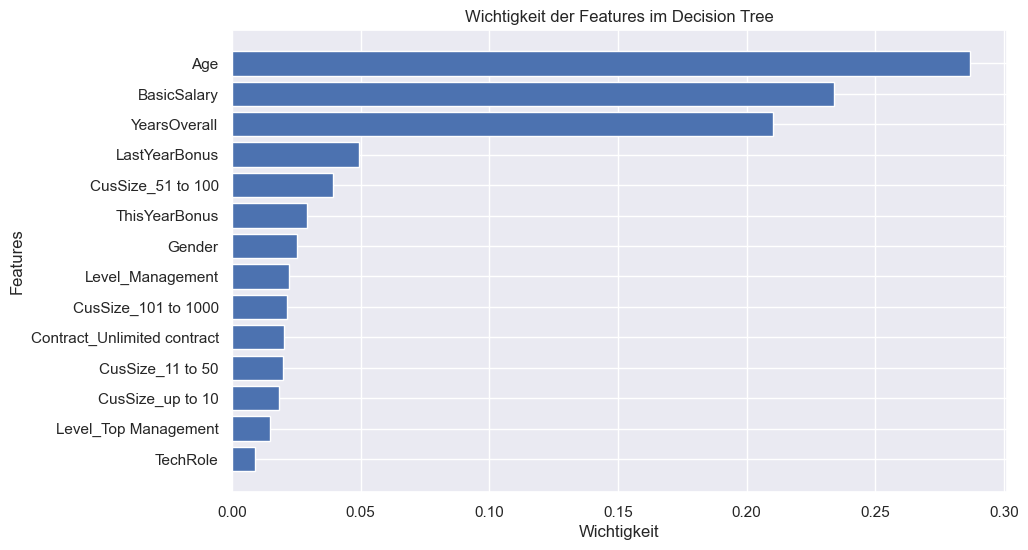

In [135]:
# Wichtigkeit der Features abrufen
importances = model_dt.feature_importances_
feature_names = np.array(x_train.columns)

# Sortieren der Features nach ihrer Wichtigkeit
sorted_indices = np.argsort(importances)
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

print(sorted_importances)

# Darstellung der Wichtigkeit der Features
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel("Wichtigkeit")
plt.ylabel("Features")
plt.title("Wichtigkeit der Features im Decision Tree")
plt.show()

## Modellbildung Random Forest

#### Model Creation

In [136]:
# Modell erstellen mit fixem random_state (ermöglicht die Reproduzierbarkeit von zufälligen Abläufen oder Zufallsgenerierungen)
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

#### Hyperparameter Optimization

#### Evaluation

In [137]:
# Werte vorhersagen für train data
predictions_rf_train = model_rf.predict(x_train)

# Werte vorhersagen für test data
predictions_rf_test = model_rf.predict(x_test)

##### Confusion matrix

In [138]:
# confusion matrix erstellen für train data
cm = confusion_matrix(y_train, predictions_rf_train)
print(cm)

[[727   2]
 [  0 729]]


In [139]:
# confusion matrix erstellen für test data
cm = confusion_matrix(y_test, predictions_rf_test)
print(cm)

[[165  13]
 [ 37   6]]


In [140]:
print("Trainingsdaten Random Forest:")
print(classification_report(y_train, predictions_rf_train))
print("--------------------------------------------------------")
print("Trainingsdaten Random Forest:")
print(classification_report(y_test, predictions_rf_test))

Trainingsdaten Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       729
           1       1.00      1.00      1.00       729

    accuracy                           1.00      1458
   macro avg       1.00      1.00      1.00      1458
weighted avg       1.00      1.00      1.00      1458

--------------------------------------------------------
Trainingsdaten Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       178
           1       0.32      0.14      0.19        43

    accuracy                           0.77       221
   macro avg       0.57      0.53      0.53       221
weighted avg       0.72      0.77      0.74       221



### Verschiedene Baumtiefen Random Forest

In [141]:
tree_depth = [1, 2 ,3, 4, 5, 10]

seed=1337
np.random.seed(seed)

for i in tree_depth:
    rf = RandomForestClassifier(max_depth=i)
    rf.fit(x_train, y_train)
    print('Max tree depth: ', i)
    print('Train results:')
    print(classification_report(y_train, rf.predict(x_train)))
    print("--------------------------------------------------------")
    print('Test results:')
    print(classification_report(y_test, rf.predict(x_test)))
    print('##############################################################################')

Max tree depth:  1
Train results:
              precision    recall  f1-score   support

           0       0.60      0.78      0.68       729
           1       0.68      0.47      0.56       729

    accuracy                           0.63      1458
   macro avg       0.64      0.63      0.62      1458
weighted avg       0.64      0.63      0.62      1458

--------------------------------------------------------
Test results:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       178
           1       0.30      0.42      0.35        43

    accuracy                           0.69       221
   macro avg       0.57      0.59      0.57       221
weighted avg       0.74      0.69      0.71       221

##############################################################################
Max tree depth:  2
Train results:
              precision    recall  f1-score   support

           0       0.61      0.77      0.68       729
           1       

### Optimierung Klasse 1

In [153]:
#Übergewichtung Klasse '1' um Faktor 2
seed=1337
np.random.seed(seed)
rf_final = RandomForestClassifier(max_depth=5)
class_weights={0:1,1:2}
rf_final.set_params(class_weight=class_weights)
rf_final.fit(x_train, y_train)

print(classification_report(y_test, rf_final.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.13      0.22       178
           1       0.20      0.91      0.33        43

    accuracy                           0.28       221
   macro avg       0.53      0.52      0.28       221
weighted avg       0.73      0.28      0.24       221



Text(0.5, 22.249999999999993, 'Predicted')

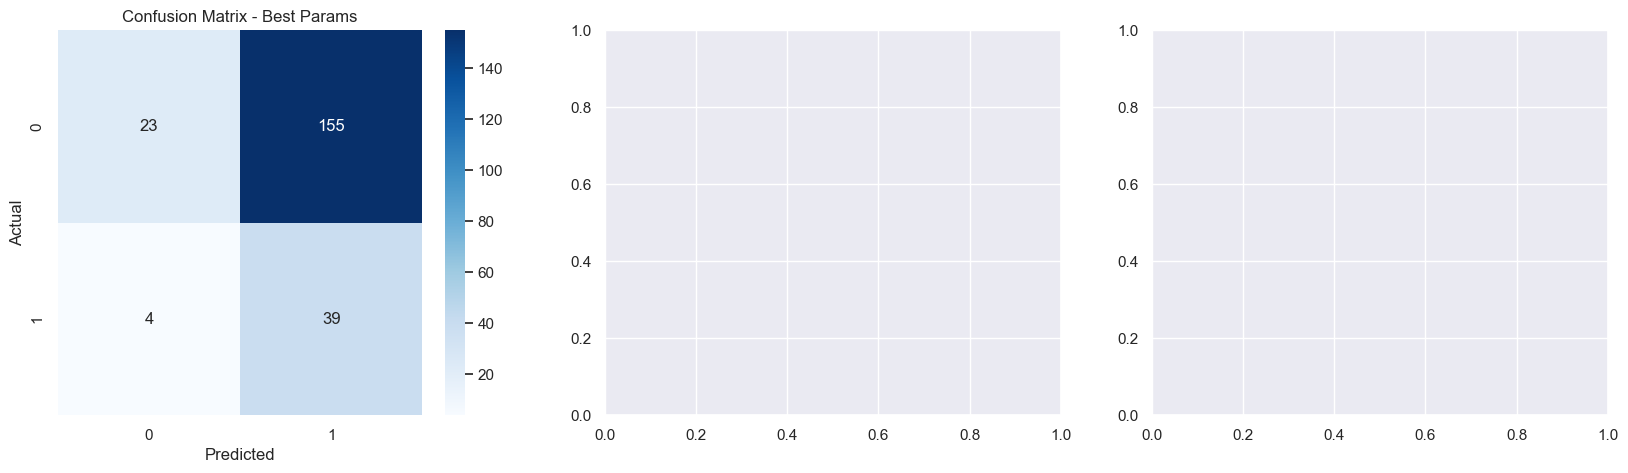

In [143]:
rf_bet = rf_final.predict(x_test)

cm_best_params = confusion_matrix(y_test, rf_bet)
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.heatmap(cm_best_params, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Confusion Matrix - Best Params')
ax[0].set_ylabel('Actual')
ax[0].set_xlabel('Predicted')

##### Check Feature importance

[0.00899359 0.01500464 0.01834133 0.01996287 0.02024721 0.02129055
 0.02210339 0.02526216 0.02906846 0.03948    0.0492886  0.21013263
 0.23406765 0.28675693]


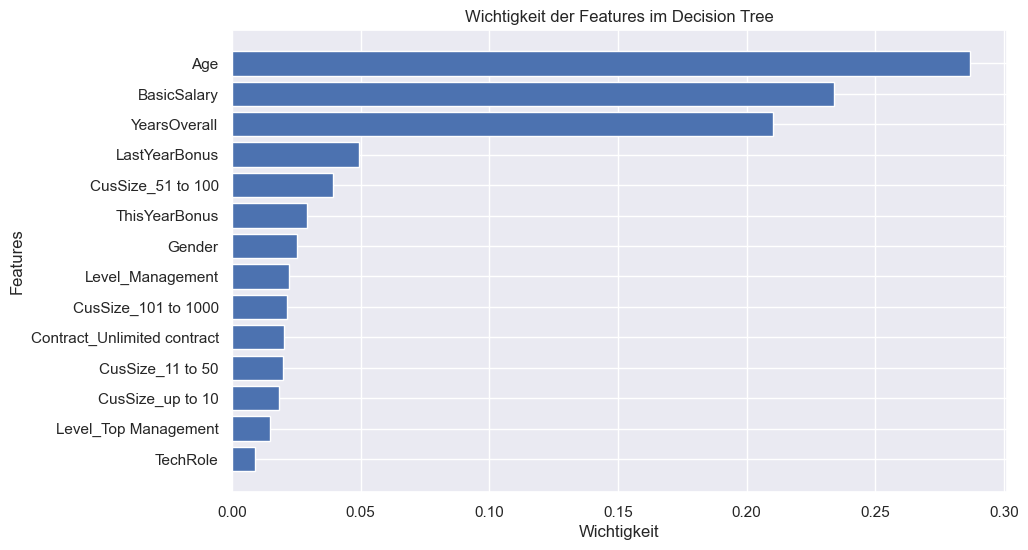

In [144]:
# Wichtigkeit der Features abrufen
importances = model_dt.feature_importances_
feature_names = np.array(x_train.columns)

# Sortieren der Features nach ihrer Wichtigkeit
sorted_indices = np.argsort(importances)
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

print(sorted_importances)

# Darstellung der Wichtigkeit der Features
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances)
plt.xlabel("Wichtigkeit")
plt.ylabel("Features")
plt.title("Wichtigkeit der Features im Decision Tree")
plt.show()

## Modellbildung XGBoost

#### Model Creation

In [73]:
#conda install xgboost

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\bachl\AppData\Local\anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB
    ca-certificates-2023.05.30 |       haa95532_0         120 KB
    conda-23.5.2               |  py310haa95532_0         1.0 MB
    libxgboost-1.7.3           |       hd77b12b_0         1.5 MB
    openssl-1.1.1u             |       h2bbff1b_0         5.5 MB
    py-xgboost-1.7.3           |  py310haa95532_0         200 KB
    xgboost-1.7.3              |  py310haa95532_0          12 KB
    ------------------------------------------------------------
                                           Total:         8.4 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mute

In [145]:
import xgboost as xgb

# Modell erstellen mit fixem random_state (ermöglicht die Reproduzierbarkeit von zufälligen Abläufen oder Zufallsgenerierungen)
model_xgb = xgb.XGBClassifier(random_state=42)

# XGBoost-Parameter festlegen
params = {
    'objective': 'binary:logistic',  # Binäre Klassifikation
    'eval_metric': 'logloss',        # Bewertungsmetrik (logarithmischer Verlust)
}

# Modell trainieren
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

#### Evaluation

In [146]:
# Vorhersagen für Trainingsdaten machen
predictions_xgb_train = model_xgb.predict(x_train)

# Vorhersagen für Testdaten machen
predictions_xgb_test = model_xgb.predict(x_test)

# Rundungsregel anwenden, um binäre Vorhersagen zu erhalten
binary_predictions_xgb_train = [1 if p >= 0.5 else 0 for p in predictions_xgb_train]
binary_predictions_xgb_test = [1 if p >= 0.5 else 0 for p in predictions_xgb_test]

##### Confusion matrix

In [147]:
# confusion matrix erstellen für train data
cm = confusion_matrix(y_train, binary_predictions_xgb_train)
print(cm)

[[722   7]
 [  1 728]]


In [148]:
# confusion matrix erstellen für test data
cm = confusion_matrix(y_test, binary_predictions_xgb_test)
print(cm)

[[149  29]
 [ 27  16]]


In [149]:
print("Trainingsdaten XGBoost:")
print(classification_report(y_train, binary_predictions_xgb_train))
print("--------------------------------------------------------")
print("Trainingsdaten XGBoost:")
print(classification_report(y_test, binary_predictions_xgb_test))

Trainingsdaten XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       729
           1       0.99      1.00      0.99       729

    accuracy                           0.99      1458
   macro avg       0.99      0.99      0.99      1458
weighted avg       0.99      0.99      0.99      1458

--------------------------------------------------------
Trainingsdaten XGBoost:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       178
           1       0.36      0.37      0.36        43

    accuracy                           0.75       221
   macro avg       0.60      0.60      0.60       221
weighted avg       0.75      0.75      0.75       221



##### Check Feature importance

In [150]:
# Feature Importance abrufen
importance = model_xgb.feature_importances_

# Ausgabe der Feature Importance
for i, feature in enumerate(x_train.columns):
    print(f'{feature}: {importance[i]}')

Age: 0.058555662631988525
Gender: 0.05408865585923195
YearsOverall: 0.07088711857795715
BasicSalary: 0.06826566159725189
TechRole: 0.14343881607055664
ThisYearBonus: 0.08125752955675125
LastYearBonus: 0.05332139879465103
Contract_Unlimited contract: 0.05262937396764755
CusSize_101 to 1000: 0.05303412303328514
CusSize_11 to 50: 0.07323794811964035
CusSize_51 to 100: 0.07522866874933243
CusSize_up to 10: 0.06496801227331161
Level_Management: 0.05609961599111557
Level_Top Management: 0.09498732537031174
